# Home Location Inference

In [1]:
import sys
sys.path.insert(0,'..')
from datastore import DataStore
from home_location import HomeLocator

Load some CDR data, antennas data, and (optionally) spatial files, whose paths have been defined in `config.yml`. Define the geographic granularity for inference (options are ‘antenna_id’, ‘tower_id’ if a tower_id is provided in the antennas files, or any of the spatial files). Optionally load wealth prediction data to construct a poverty map and ground truth location data to evaluate accuracy.

In [2]:
datastore = DataStore(cfg_dir='../configs/config.yml')
home_locator = HomeLocator(datastore=datastore, clean_folders=True)

Loading CDR...
Loading antennas...


Filter to a specific date range.

In [3]:
home_locator.ds.filter_dates('2020-01-05', '2020-02-01')

Try running the three different home location algorithms.

In [4]:
home_locator.get_home_locations(algo='count_transactions')
home_locator.get_home_locations(algo='count_days')
home_locator.get_home_locations(algo='count_modal_days')

,subscriber_id,tower_id,count_modal_days
0,JGPCbfDGes,t35,4
1,YtvkGlMWwe,t39,4
2,dYwshzRseD,t26,4
3,dsBHAdXrrk,t35,2
4,ygMEXUQDbn,t27,4
...,...,...,...
995,amzyXHglBx,t7,3
996,dJSvXqUVSY,t64,3
997,ptudOnjdRU,t35,5
998,uXZrufHOmE,t79,4


Generate a population map based on inferred home locations using the unique days algorithm. Use points at each of the tower locations.

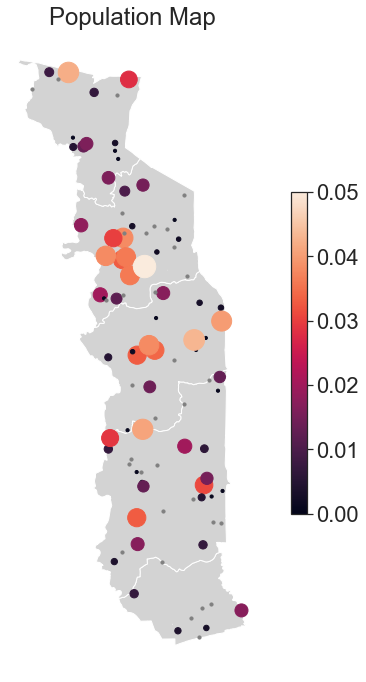

In [5]:
home_locator.map(algo='count_days', kind='population', voronoi=False)

Evaluate the accuracy of the home location inference using the ground truth data. Generate maps and a table of precision and recall for each tower.

Observations with inferred home location: 1000 (1000 unique)
Observations with ground truth home location: 1000 (1000 unique)
Observations with both: 1000 (1000 unique)
Overall accuracy: 0.02


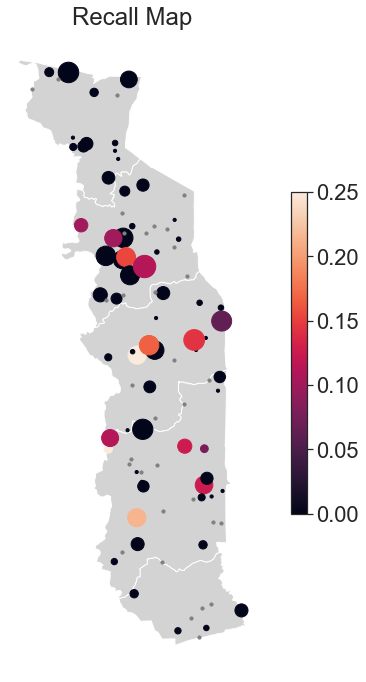

In [6]:
home_locator.accuracy(algo='count_days')
home_locator.map(algo = 'count_days', kind='recall', voronoi=False)

In [11]:
home_locator.accuracy_tables['count_days'].head()

,tower_id,recall,precision,overall_accuracy
67,t7,0.076923,0.166667,0.017
15,t22,0.250000,0.142857,0.017
33,t39,0.214286,0.090909,0.017
66,t69,0.100000,0.055556,0.017
37,t42,0.153846,0.055556,0.017


Use population density maps to identify which areas are over/under-represented in your sample.

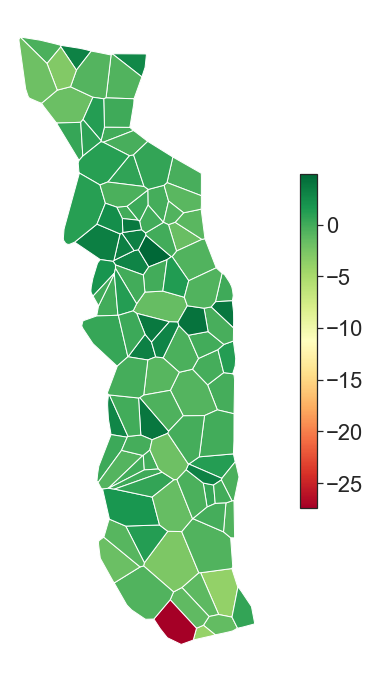

In [12]:
home_locator.pop_comparison(algo='count_days')